<a href="https://colab.research.google.com/github/rheakgoswami/Colias-Philodice-Data-Extraction/blob/main/color_chip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
from PIL import Image 

In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#a short cut to call various images
WORKING_DIRECTORY = "/content/drive/MyDrive/ColiasPhilodice/images"

In [ ]:
# (From Colin):
# Test image reading
# Note CV opens file using BGR color order
# Since numpy expects RGB we have to flip the color/channel axis for it to be RGB
for x in range(21):
  i = 1+x
  img = cv2.imread(WORKING_DIRECTORY + '/' + str(i) +'.jpg') 
  img_np = np.flip(np.array(img), axis=2)
  plt.imshow(img_np)
  plt.show()

I'll be documenting my process of creating this algorithm to analyze the color chip in each of the entomology pictures from the Yale Peabody Museum. So, the first thought that came to mind to create the algorithm was to somehow identify the coordinates of the color chip itself in each image because the color chip isn't in exactly the same position in each picture. After some research, I decided it would be the easiest to deploy a template matching algorithm from OpenCV. 

Source: https://stackoverflow.com/questions/7853628/how-do-i-find-an-image-contained-within-an-image

Okay, from that algorithm we can clearly now see the blue box around the color chip and we have its coordinates as well. So, my next step is to extract the hex values of each of the tiles in the color chip. 

KEY ASSUMPTIONS MADE:  

*   Color chip is symmetrically laid out - which allows us to use simple math to essentially find the center of each chip
*   Regardless of orientation the center of the color chip can be found so that we can extract the hex value

Source: 
https://stackoverflow.com/questions/50178248/detect-color-in-the-middle-of-image-opencv-python 



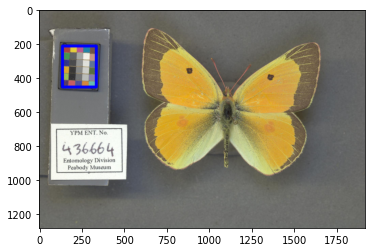

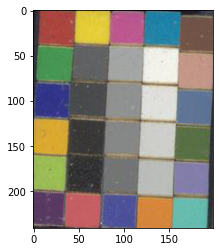

{'burnt red': (172, 69, 62), 'yellow': (230, 206, 56), 'magenta': (188, 88, 142), 'cerulean': (34, 134, 170), 'brown': (113, 83, 72), 'green': (69, 150, 83), 'dark gray 1': (95, 96, 98), 'light gray 1': (163, 165, 164), 'white 1': (241, 241, 233), 'tan': (199, 153, 138), 'cobalt': (49, 52, 133), 'dark gray 2': (74, 75, 77), 'light gray 2': (145, 147, 146), 'white 2': (223, 224, 219), 'denim blue': (95, 115, 148), 'mustard': (220, 170, 47), 'dark gray 3': (57, 56, 54), 'light gray 3': (133, 137, 136), 'white 3': (207, 208, 203), 'sage green': (90, 113, 69), 'lime green': (155, 194, 77), 'black': (49, 49, 51), 'dark gray 4': (115, 114, 119), 'white 4': (187, 189, 186), 'purple': (131, 125, 169), 'violet': (94, 56, 97), 'peach pink': (199, 96, 100), 'lapis blue': (79, 78, 158), 'orange': (217, 138, 61), 'turquoise': (107, 193, 180)}


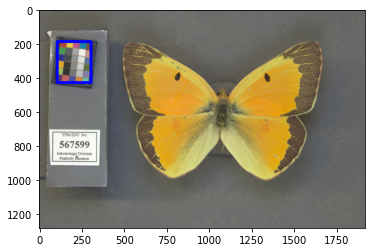

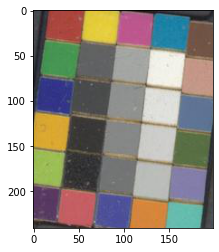

{'burnt red': (171, 68, 63), 'yellow': (229, 202, 69), 'magenta': (187, 89, 140), 'cerulean': (31, 131, 165), 'brown': (111, 83, 69), 'green': (72, 151, 85), 'dark gray 1': (96, 97, 99), 'light gray 1': (163, 165, 162), 'white 1': (242, 242, 234), 'tan': (198, 149, 135), 'cobalt': (54, 52, 135), 'dark gray 2': (74, 75, 77), 'light gray 2': (144, 146, 143), 'white 2': (223, 224, 219), 'denim blue': (95, 115, 148), 'mustard': (223, 171, 51), 'dark gray 3': (57, 56, 54), 'light gray 3': (133, 135, 134), 'white 3': (205, 205, 203), 'sage green': (90, 108, 68), 'lime green': (154, 192, 81), 'black': (51, 51, 51), 'dark gray 4': (115, 117, 116), 'white 4': (187, 189, 186), 'purple': (132, 125, 176), 'violet': (94, 69, 99), 'peach pink': (198, 91, 101), 'lapis blue': (79, 87, 159), 'orange': (215, 136, 57), 'turquoise': (101, 191, 181)}


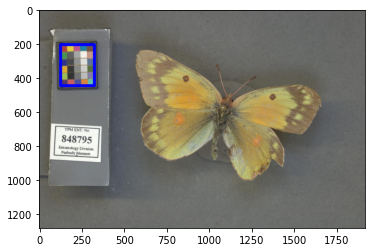

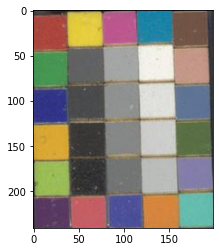

{'burnt red': (173, 70, 63), 'yellow': (232, 207, 63), 'magenta': (184, 91, 138), 'cerulean': (21, 130, 169), 'brown': (108, 80, 68), 'green': (70, 151, 84), 'dark gray 1': (97, 98, 100), 'light gray 1': (164, 166, 165), 'white 1': (246, 243, 236), 'tan': (197, 151, 136), 'cobalt': (50, 52, 137), 'dark gray 2': (74, 75, 77), 'light gray 2': (144, 146, 143), 'white 2': (224, 225, 220), 'denim blue': (95, 115, 150), 'mustard': (219, 168, 51), 'dark gray 3': (52, 51, 49), 'light gray 3': (134, 136, 135), 'white 3': (204, 204, 202), 'sage green': (88, 109, 66), 'lime green': (152, 186, 89), 'black': (53, 53, 53), 'dark gray 4': (121, 123, 122), 'white 4': (188, 190, 187), 'purple': (131, 125, 169), 'violet': (96, 65, 106), 'peach pink': (199, 96, 100), 'lapis blue': (77, 79, 153), 'orange': (213, 133, 62), 'turquoise': (101, 189, 175)}


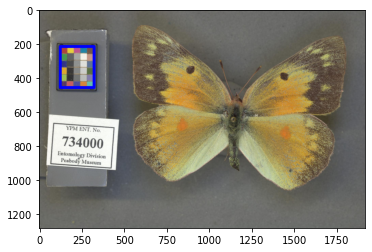

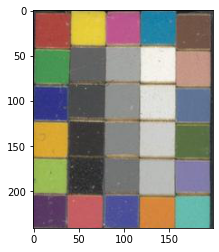

{'burnt red': (171, 68, 61), 'yellow': (231, 205, 58), 'magenta': (185, 85, 139), 'cerulean': (31, 130, 162), 'brown': (117, 89, 77), 'green': (71, 150, 84), 'dark gray 1': (98, 100, 99), 'light gray 1': (164, 166, 163), 'white 1': (247, 244, 237), 'tan': (196, 150, 135), 'cobalt': (52, 54, 137), 'dark gray 2': (73, 74, 76), 'light gray 2': (145, 147, 146), 'white 2': (221, 222, 217), 'denim blue': (95, 115, 148), 'mustard': (220, 170, 49), 'dark gray 3': (56, 55, 53), 'light gray 3': (133, 135, 134), 'white 3': (205, 205, 203), 'sage green': (91, 112, 71), 'lime green': (159, 194, 90), 'black': (48, 48, 48), 'dark gray 4': (115, 117, 116), 'white 4': (185, 187, 184), 'purple': (131, 125, 173), 'violet': (89, 57, 98), 'peach pink': (199, 96, 100), 'lapis blue': (73, 77, 151), 'orange': (216, 134, 60), 'turquoise': (101, 187, 174)}


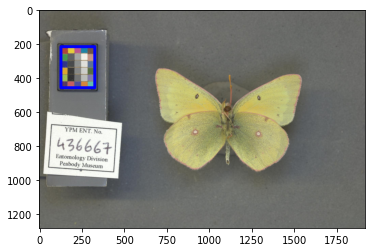

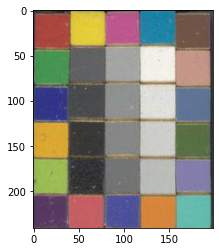

{'burnt red': (166, 65, 57), 'yellow': (232, 204, 79), 'magenta': (188, 87, 145), 'cerulean': (24, 136, 173), 'brown': (143, 115, 101), 'green': (70, 149, 83), 'dark gray 1': (96, 97, 99), 'light gray 1': (165, 167, 166), 'white 1': (243, 243, 235), 'tan': (198, 152, 137), 'cobalt': (48, 50, 133), 'dark gray 2': (77, 74, 83), 'light gray 2': (138, 147, 146), 'white 2': (226, 222, 221), 'denim blue': (95, 115, 148), 'mustard': (219, 169, 46), 'dark gray 3': (55, 55, 53), 'light gray 3': (134, 136, 135), 'white 3': (204, 204, 202), 'sage green': (87, 110, 66), 'lime green': (164, 196, 95), 'black': (41, 41, 41), 'dark gray 4': (118, 118, 118), 'white 4': (187, 189, 186), 'purple': (131, 125, 171), 'violet': (88, 57, 98), 'peach pink': (199, 100, 103), 'lapis blue': (75, 78, 155), 'orange': (212, 133, 58), 'turquoise': (101, 189, 175)}


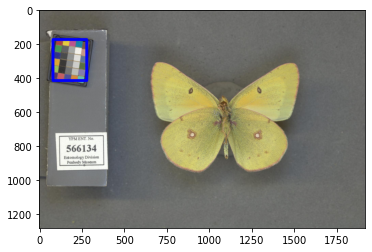

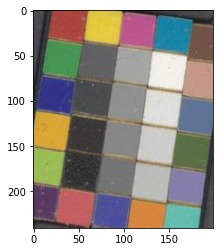

{'burnt red': (170, 68, 66), 'yellow': (232, 204, 58), 'magenta': (187, 88, 135), 'cerulean': (28, 130, 168), 'brown': (112, 83, 69), 'green': (74, 153, 88), 'dark gray 1': (96, 97, 99), 'light gray 1': (166, 168, 167), 'white 1': (240, 237, 230), 'tan': (200, 152, 140), 'cobalt': (54, 52, 125), 'dark gray 2': (73, 75, 74), 'light gray 2': (144, 146, 145), 'white 2': (226, 226, 224), 'denim blue': (89, 112, 146), 'mustard': (221, 168, 56), 'dark gray 3': (59, 58, 56), 'light gray 3': (133, 135, 134), 'white 3': (208, 205, 200), 'sage green': (87, 107, 70), 'lime green': (157, 189, 90), 'black': (49, 49, 51), 'dark gray 4': (117, 117, 117), 'white 4': (189, 189, 191), 'purple': (133, 124, 179), 'violet': (154, 139, 146), 'peach pink': (164, 104, 106), 'lapis blue': (81, 81, 141), 'orange': (195, 143, 57), 'turquoise': (101, 186, 179)}


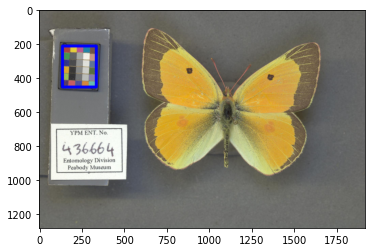

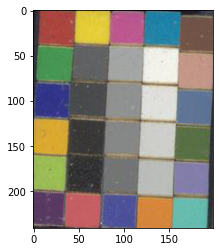

{'burnt red': (172, 69, 62), 'yellow': (230, 206, 56), 'magenta': (188, 88, 142), 'cerulean': (34, 134, 170), 'brown': (113, 83, 72), 'green': (69, 150, 83), 'dark gray 1': (95, 96, 98), 'light gray 1': (163, 165, 164), 'white 1': (241, 241, 233), 'tan': (199, 153, 138), 'cobalt': (49, 52, 133), 'dark gray 2': (74, 75, 77), 'light gray 2': (145, 147, 146), 'white 2': (223, 224, 219), 'denim blue': (95, 115, 148), 'mustard': (220, 170, 47), 'dark gray 3': (57, 56, 54), 'light gray 3': (133, 137, 136), 'white 3': (207, 208, 203), 'sage green': (90, 113, 69), 'lime green': (155, 194, 77), 'black': (49, 49, 51), 'dark gray 4': (115, 114, 119), 'white 4': (187, 189, 186), 'purple': (131, 125, 169), 'violet': (94, 56, 97), 'peach pink': (199, 96, 100), 'lapis blue': (79, 78, 158), 'orange': (217, 138, 61), 'turquoise': (107, 193, 180)}


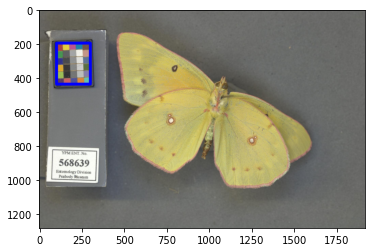

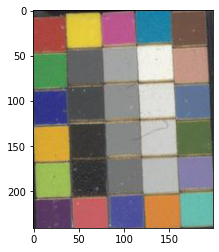

{'burnt red': (167, 73, 61), 'yellow': (234, 209, 65), 'magenta': (188, 87, 143), 'cerulean': (31, 127, 167), 'brown': (113, 84, 70), 'green': (72, 152, 79), 'dark gray 1': (98, 99, 101), 'light gray 1': (164, 165, 167), 'white 1': (244, 245, 229), 'tan': (196, 150, 135), 'cobalt': (51, 49, 133), 'dark gray 2': (73, 74, 76), 'light gray 2': (145, 147, 146), 'white 2': (223, 224, 219), 'denim blue': (95, 115, 150), 'mustard': (226, 164, 65), 'dark gray 3': (55, 54, 52), 'light gray 3': (134, 136, 135), 'white 3': (204, 204, 202), 'sage green': (89, 110, 67), 'lime green': (158, 192, 80), 'black': (52, 52, 52), 'dark gray 4': (117, 119, 118), 'white 4': (188, 190, 187), 'purple': (132, 126, 170), 'violet': (97, 63, 100), 'peach pink': (199, 94, 99), 'lapis blue': (75, 79, 152), 'orange': (216, 134, 60), 'turquoise': (102, 190, 174)}


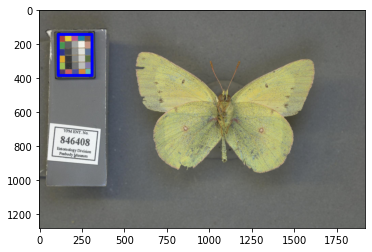

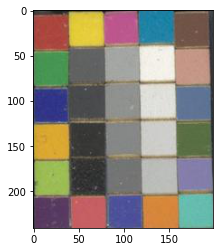

{'burnt red': (173, 70, 63), 'yellow': (229, 204, 60), 'magenta': (185, 85, 139), 'cerulean': (30, 128, 163), 'brown': (119, 89, 78), 'green': (72, 151, 85), 'dark gray 1': (98, 97, 93), 'light gray 1': (164, 168, 171), 'white 1': (249, 245, 242), 'tan': (200, 153, 137), 'cobalt': (43, 48, 132), 'dark gray 2': (74, 75, 77), 'light gray 2': (144, 146, 143), 'white 2': (225, 226, 221), 'denim blue': (95, 115, 148), 'mustard': (221, 171, 48), 'dark gray 3': (55, 55, 53), 'light gray 3': (133, 134, 138), 'white 3': (207, 208, 200), 'sage green': (87, 110, 66), 'lime green': (158, 190, 89), 'black': (49, 51, 50), 'dark gray 4': (125, 125, 125), 'white 4': (185, 187, 184), 'purple': (130, 124, 168), 'violet': (90, 62, 102), 'peach pink': (199, 96, 100), 'lapis blue': (76, 80, 153), 'orange': (214, 135, 60), 'turquoise': (94, 186, 171)}


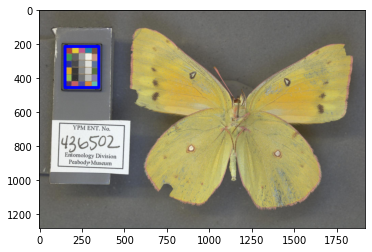

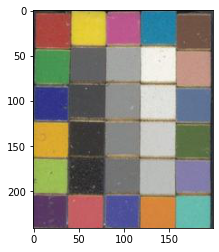

{'burnt red': (164, 72, 61), 'yellow': (231, 205, 60), 'magenta': (193, 86, 140), 'cerulean': (34, 128, 166), 'brown': (115, 86, 72), 'green': (69, 150, 83), 'dark gray 1': (98, 98, 100), 'light gray 1': (164, 164, 164), 'white 1': (243, 240, 233), 'tan': (196, 148, 134), 'cobalt': (48, 50, 133), 'dark gray 2': (76, 76, 78), 'light gray 2': (147, 151, 150), 'white 2': (222, 223, 218), 'denim blue': (95, 115, 148), 'mustard': (218, 170, 46), 'dark gray 3': (59, 58, 56), 'light gray 3': (132, 136, 135), 'white 3': (204, 204, 202), 'sage green': (89, 110, 67), 'lime green': (162, 195, 88), 'black': (49, 49, 49), 'dark gray 4': (117, 117, 115), 'white 4': (187, 189, 186), 'purple': (132, 126, 170), 'violet': (87, 56, 97), 'peach pink': (199, 96, 100), 'lapis blue': (70, 80, 142), 'orange': (215, 133, 59), 'turquoise': (102, 188, 175)}


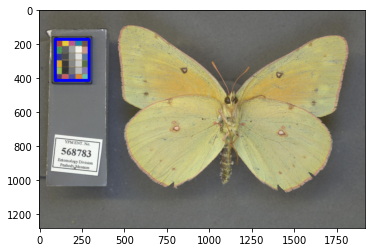

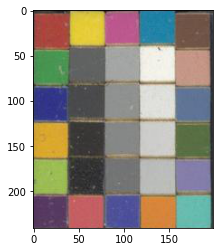

{'burnt red': (169, 68, 58), 'yellow': (230, 202, 67), 'magenta': (190, 90, 144), 'cerulean': (31, 130, 169), 'brown': (142, 114, 102), 'green': (80, 155, 90), 'dark gray 1': (97, 99, 98), 'light gray 1': (164, 166, 165), 'white 1': (244, 244, 236), 'tan': (196, 149, 133), 'cobalt': (49, 52, 133), 'dark gray 2': (75, 75, 75), 'light gray 2': (143, 145, 142), 'white 2': (222, 223, 218), 'denim blue': (95, 115, 150), 'mustard': (220, 170, 45), 'dark gray 3': (57, 56, 54), 'light gray 3': (134, 136, 135), 'white 3': (207, 207, 205), 'sage green': (88, 111, 67), 'lime green': (160, 193, 88), 'black': (44, 44, 46), 'dark gray 4': (118, 118, 118), 'white 4': (188, 190, 187), 'purple': (132, 126, 170), 'violet': (87, 59, 99), 'peach pink': (189, 101, 97), 'lapis blue': (82, 84, 158), 'orange': (215, 133, 59), 'turquoise': (103, 189, 176)}


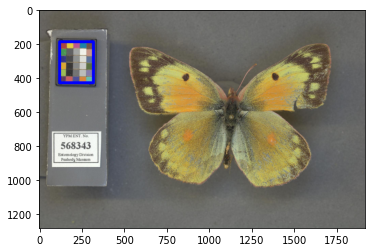

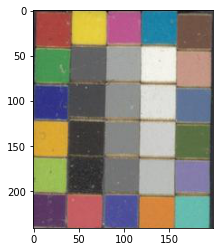

{'burnt red': (171, 73, 64), 'yellow': (229, 206, 66), 'magenta': (188, 88, 142), 'cerulean': (30, 130, 162), 'brown': (117, 87, 76), 'green': (68, 148, 85), 'dark gray 1': (96, 97, 99), 'light gray 1': (164, 166, 165), 'white 1': (240, 240, 232), 'tan': (196, 150, 134), 'cobalt': (49, 51, 128), 'dark gray 2': (77, 77, 79), 'light gray 2': (141, 147, 145), 'white 2': (225, 226, 221), 'denim blue': (94, 114, 147), 'mustard': (219, 168, 50), 'dark gray 3': (55, 54, 52), 'light gray 3': (132, 136, 135), 'white 3': (206, 206, 204), 'sage green': (90, 111, 68), 'lime green': (155, 193, 82), 'black': (52, 52, 52), 'dark gray 4': (117, 117, 117), 'white 4': (186, 188, 185), 'purple': (133, 126, 170), 'violet': (91, 56, 98), 'peach pink': (199, 96, 100), 'lapis blue': (81, 75, 145), 'orange': (216, 134, 60), 'turquoise': (102, 188, 175)}


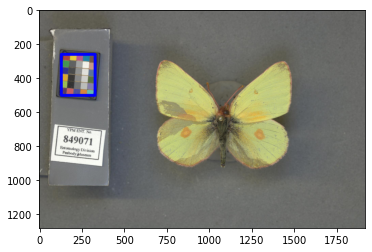

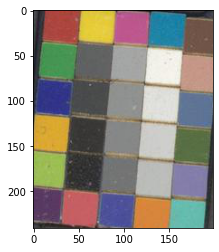

{'burnt red': (173, 70, 65), 'yellow': (231, 205, 56), 'magenta': (190, 87, 142), 'cerulean': (28, 131, 166), 'brown': (112, 84, 72), 'green': (72, 152, 83), 'dark gray 1': (96, 97, 101), 'light gray 1': (162, 164, 163), 'white 1': (246, 243, 236), 'tan': (197, 150, 134), 'cobalt': (51, 53, 140), 'dark gray 2': (72, 74, 73), 'light gray 2': (144, 146, 145), 'white 2': (224, 225, 220), 'denim blue': (93, 116, 148), 'mustard': (224, 168, 59), 'dark gray 3': (56, 55, 53), 'light gray 3': (134, 136, 135), 'white 3': (206, 207, 202), 'sage green': (89, 112, 68), 'lime green': (157, 191, 81), 'black': (49, 49, 49), 'dark gray 4': (114, 114, 114), 'white 4': (189, 189, 187), 'purple': (133, 128, 169), 'violet': (87, 58, 89), 'peach pink': (189, 97, 98), 'lapis blue': (76, 80, 151), 'orange': (218, 132, 57), 'turquoise': (102, 188, 175)}


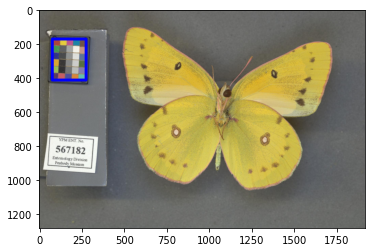

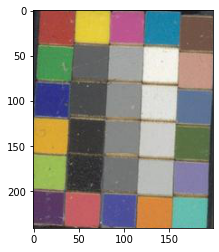

{'burnt red': (171, 68, 61), 'yellow': (232, 208, 50), 'magenta': (187, 87, 139), 'cerulean': (27, 134, 168), 'brown': (111, 83, 71), 'green': (68, 151, 83), 'dark gray 1': (95, 96, 98), 'light gray 1': (162, 164, 163), 'white 1': (242, 239, 230), 'tan': (202, 155, 139), 'cobalt': (48, 51, 132), 'dark gray 2': (74, 76, 73), 'light gray 2': (146, 146, 144), 'white 2': (223, 224, 219), 'denim blue': (95, 115, 150), 'mustard': (218, 167, 49), 'dark gray 3': (57, 56, 54), 'light gray 3': (134, 136, 135), 'white 3': (205, 205, 203), 'sage green': (91, 114, 72), 'lime green': (153, 188, 84), 'black': (49, 49, 49), 'dark gray 4': (113, 115, 114), 'white 4': (186, 188, 185), 'purple': (130, 124, 168), 'violet': (85, 56, 100), 'peach pink': (199, 96, 100), 'lapis blue': (76, 79, 146), 'orange': (216, 134, 60), 'turquoise': (102, 189, 173)}


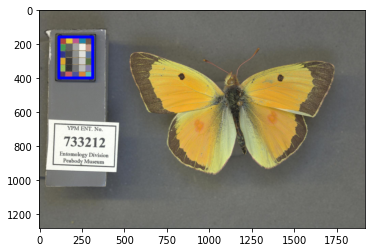

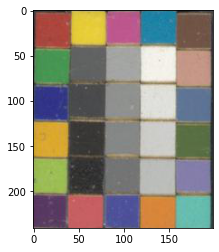

{'burnt red': (171, 70, 62), 'yellow': (232, 207, 55), 'magenta': (190, 87, 142), 'cerulean': (32, 130, 165), 'brown': (124, 95, 81), 'green': (71, 150, 84), 'dark gray 1': (97, 99, 98), 'light gray 1': (164, 166, 163), 'white 1': (244, 241, 234), 'tan': (199, 152, 136), 'cobalt': (50, 52, 137), 'dark gray 2': (74, 75, 77), 'light gray 2': (145, 147, 144), 'white 2': (222, 223, 218), 'denim blue': (95, 115, 148), 'mustard': (220, 167, 51), 'dark gray 3': (56, 55, 53), 'light gray 3': (133, 135, 134), 'white 3': (206, 206, 204), 'sage green': (88, 111, 67), 'lime green': (163, 196, 89), 'black': (46, 46, 46), 'dark gray 4': (116, 116, 116), 'white 4': (187, 189, 186), 'purple': (133, 126, 170), 'violet': (87, 56, 97), 'peach pink': (200, 95, 99), 'lapis blue': (79, 83, 156), 'orange': (219, 136, 58), 'turquoise': (103, 190, 174)}


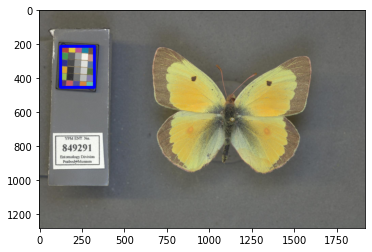

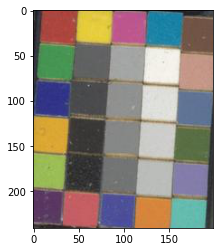

{'burnt red': (175, 72, 65), 'yellow': (232, 209, 71), 'magenta': (189, 86, 141), 'cerulean': (22, 131, 164), 'brown': (113, 84, 70), 'green': (72, 151, 85), 'dark gray 1': (94, 96, 95), 'light gray 1': (162, 164, 163), 'white 1': (243, 240, 233), 'tan': (198, 152, 136), 'cobalt': (49, 51, 136), 'dark gray 2': (74, 75, 77), 'light gray 2': (144, 146, 145), 'white 2': (224, 225, 220), 'denim blue': (96, 114, 152), 'mustard': (220, 167, 53), 'dark gray 3': (55, 54, 52), 'light gray 3': (134, 136, 135), 'white 3': (204, 204, 202), 'sage green': (88, 111, 69), 'lime green': (155, 190, 86), 'black': (51, 51, 51), 'dark gray 4': (116, 118, 117), 'white 4': (187, 189, 186), 'purple': (133, 126, 170), 'violet': (91, 56, 98), 'peach pink': (199, 96, 100), 'lapis blue': (78, 82, 156), 'orange': (216, 134, 60), 'turquoise': (93, 196, 179)}


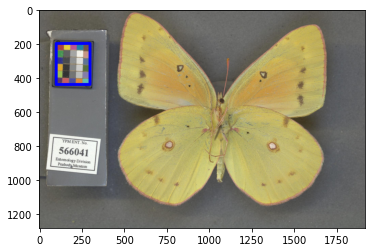

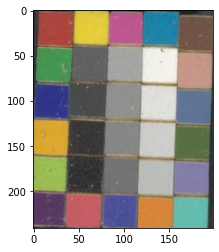

{'burnt red': (175, 72, 65), 'yellow': (231, 204, 63), 'magenta': (190, 87, 143), 'cerulean': (34, 134, 170), 'brown': (115, 86, 72), 'green': (68, 149, 82), 'dark gray 1': (97, 97, 97), 'light gray 1': (163, 165, 162), 'white 1': (241, 238, 231), 'tan': (200, 152, 138), 'cobalt': (50, 52, 137), 'dark gray 2': (76, 77, 79), 'light gray 2': (145, 147, 146), 'white 2': (223, 224, 219), 'denim blue': (96, 115, 148), 'mustard': (219, 169, 46), 'dark gray 3': (57, 56, 54), 'light gray 3': (135, 137, 136), 'white 3': (206, 206, 204), 'sage green': (90, 113, 69), 'lime green': (158, 191, 87), 'black': (54, 54, 54), 'dark gray 4': (113, 115, 114), 'white 4': (185, 187, 184), 'purple': (133, 127, 171), 'violet': (87, 57, 95), 'peach pink': (197, 96, 102), 'lapis blue': (75, 79, 152), 'orange': (213, 135, 60), 'turquoise': (100, 188, 174)}


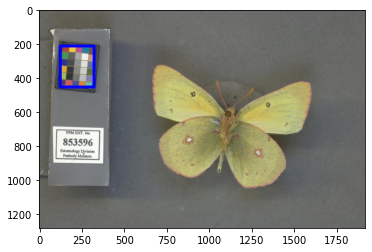

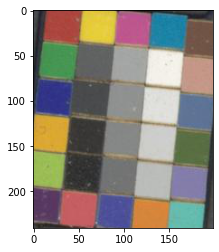

{'burnt red': (174, 71, 64), 'yellow': (229, 206, 51), 'magenta': (190, 87, 142), 'cerulean': (31, 129, 166), 'brown': (113, 85, 71), 'green': (79, 148, 83), 'dark gray 1': (96, 98, 95), 'light gray 1': (163, 165, 164), 'white 1': (246, 243, 236), 'tan': (197, 151, 135), 'cobalt': (49, 51, 136), 'dark gray 2': (74, 75, 77), 'light gray 2': (144, 146, 145), 'white 2': (225, 226, 221), 'denim blue': (97, 116, 149), 'mustard': (221, 167, 58), 'dark gray 3': (58, 57, 55), 'light gray 3': (134, 136, 135), 'white 3': (206, 206, 206), 'sage green': (90, 112, 66), 'lime green': (154, 190, 94), 'black': (49, 49, 49), 'dark gray 4': (114, 114, 114), 'white 4': (187, 189, 186), 'purple': (131, 126, 166), 'violet': (83, 61, 99), 'peach pink': (199, 96, 100), 'lapis blue': (78, 83, 138), 'orange': (214, 132, 56), 'turquoise': (103, 186, 176)}


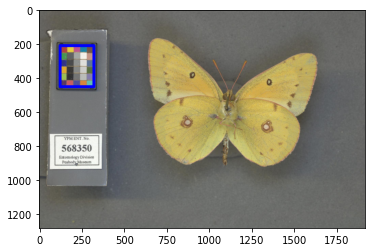

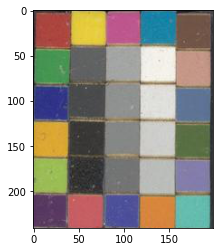

{'burnt red': (173, 70, 63), 'yellow': (232, 205, 62), 'magenta': (191, 88, 143), 'cerulean': (27, 134, 168), 'brown': (126, 98, 86), 'green': (76, 148, 84), 'dark gray 1': (98, 98, 98), 'light gray 1': (165, 165, 163), 'white 1': (244, 241, 232), 'tan': (197, 151, 136), 'cobalt': (48, 50, 137), 'dark gray 2': (77, 78, 80), 'light gray 2': (144, 146, 145), 'white 2': (223, 224, 219), 'denim blue': (95, 115, 148), 'mustard': (221, 169, 49), 'dark gray 3': (59, 58, 56), 'light gray 3': (134, 136, 133), 'white 3': (204, 204, 204), 'sage green': (89, 110, 69), 'lime green': (164, 200, 94), 'black': (45, 45, 45), 'dark gray 4': (118, 118, 118), 'white 4': (184, 186, 183), 'purple': (129, 123, 169), 'violet': (91, 56, 98), 'peach pink': (201, 98, 102), 'lapis blue': (75, 77, 152), 'orange': (217, 135, 61), 'turquoise': (97, 192, 172)}


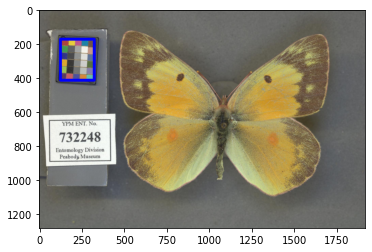

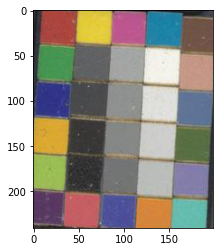

{'burnt red': (171, 72, 66), 'yellow': (231, 207, 55), 'magenta': (189, 86, 142), 'cerulean': (27, 131, 168), 'brown': (111, 83, 71), 'green': (71, 152, 85), 'dark gray 1': (96, 97, 99), 'light gray 1': (163, 165, 164), 'white 1': (246, 243, 236), 'tan': (199, 152, 136), 'cobalt': (49, 51, 134), 'dark gray 2': (74, 75, 77), 'light gray 2': (144, 146, 143), 'white 2': (223, 224, 219), 'denim blue': (95, 115, 150), 'mustard': (219, 169, 48), 'dark gray 3': (57, 56, 54), 'light gray 3': (133, 135, 134), 'white 3': (206, 206, 204), 'sage green': (87, 110, 66), 'lime green': (157, 190, 86), 'black': (48, 48, 48), 'dark gray 4': (112, 114, 113), 'white 4': (186, 188, 185), 'purple': (132, 126, 170), 'violet': (92, 61, 102), 'peach pink': (199, 96, 100), 'lapis blue': (77, 79, 154), 'orange': (216, 134, 58), 'turquoise': (106, 189, 179)}


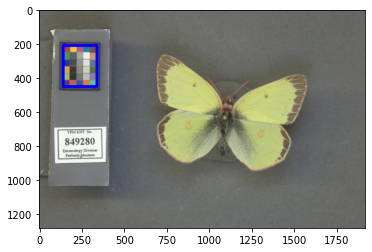

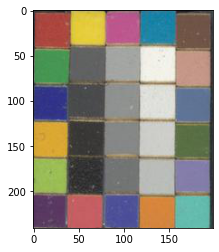

{'burnt red': (170, 67, 60), 'yellow': (232, 207, 65), 'magenta': (187, 87, 141), 'cerulean': (29, 132, 167), 'brown': (134, 106, 94), 'green': (71, 152, 85), 'dark gray 1': (98, 97, 103), 'light gray 1': (165, 167, 166), 'white 1': (245, 240, 236), 'tan': (197, 151, 136), 'cobalt': (49, 51, 134), 'dark gray 2': (74, 75, 77), 'light gray 2': (143, 145, 142), 'white 2': (222, 223, 218), 'denim blue': (95, 115, 148), 'mustard': (219, 168, 50), 'dark gray 3': (57, 56, 54), 'light gray 3': (135, 135, 135), 'white 3': (205, 206, 201), 'sage green': (89, 110, 69), 'lime green': (161, 197, 89), 'black': (45, 45, 45), 'dark gray 4': (117, 119, 118), 'white 4': (185, 187, 184), 'purple': (131, 125, 169), 'violet': (89, 54, 96), 'peach pink': (199, 96, 100), 'lapis blue': (76, 78, 155), 'orange': (214, 134, 63), 'turquoise': (103, 191, 177)}


In [10]:
template = cv2.imread(WORKING_DIRECTORY + '/colorchip.png', cv2.COLOR_BGR2RGB) 
for x in range(21):
  i = 1+x
  #read the image
  img = cv2.imread(WORKING_DIRECTORY + '/' + str(i) +'.jpg', cv2.COLOR_BGR2RGB) 

  method = cv2.TM_SQDIFF_NORMED
  res = cv2.matchTemplate(img, template, method)
  #min squared difference needed 
  mn, _, mnLoc, _ = cv2.minMaxLoc(res)

  #extract coordinates of best match
  MPx, MPy = mnLoc 

  #size of template = size of match 
  trows, tcols = template.shape[:2]

  #draw rectangle onto the original image
  cv2.rectangle(img, (MPx,MPy), (MPx+tcols,MPy+trows), 255, 15)

  #display the rectangle on the original image
  cv2.imwrite('result.png', img)

  #read the result image with the box
  #question - how to save result.png into google drve
  image = cv2.imread("result.png")

  #show the plotted image
  image_np = np.flip(np.array(image), axis=2)
  plt.imshow(image_np)
  plt.show()

  #establish the variables needed 
  #lx (left top x-coordinate) ly (left top y-coordinate)
  lx, ly = (MPx,MPy)
  #rx (right bottom x-coordinate) ry (right bottom y-coordinate)
  rx, ry = (MPx+tcols,MPy+trows)
  #width of the colorchip itself
  w = rx - lx 
  #height of the colorchip
  h = ry - ly 

  #iterating through the color chip to extract the rbg values (5 tiles on top 6 tiles on the side)
  #establishing the width + height of each color tile based on symmetry 
  w_tile = int(w/5)
  h_tile = int(h/6)

  #crop the image so that we only see the color chip
  im = Image.open(WORKING_DIRECTORY + '/' + str(i) +'.jpg')
  cr = im.crop((lx,ly,rx,ry))
  plt.imshow(cr)
  plt.show()

  rgb = cr.convert('RGB')

  color_chip = []
  #for loop to iterate through the entire chip to find each rgb value of the tile
  for y in range(6): 
    ph = 25 + (h_tile*y)
    for x in range (5):
      pw = 25 + (w_tile *x)
      r, g, b = rgb.getpixel((pw,ph))
      color_chip.append((r, g, b))

  #dictionary of all the rgb values for all the tiles
  color_chip_rgb = {"burnt red": color_chip[0], "yellow": color_chip[1], "magenta": color_chip[2], "cerulean": color_chip[3],
          "brown": color_chip[4], "green": color_chip[5], "dark gray 1": color_chip[6], "light gray 1": color_chip[7], "white 1": color_chip[8], 
          "tan": color_chip[9], "cobalt": color_chip[10], "dark gray 2": color_chip[11], "light gray 2": color_chip[12], "white 2": color_chip[13],
          "denim blue": color_chip[14], "mustard": color_chip[15], "dark gray 3": color_chip[16], "light gray 3": color_chip[17], 
          "white 3": color_chip[18], "sage green": color_chip[19], "lime green": color_chip[20], "black": color_chip[21], "dark gray 4": color_chip[22], 
          "white 4": color_chip[23], "purple": color_chip[24], "violet": color_chip[25], "peach pink": color_chip[26], "lapis blue": color_chip[27], 
          "orange": color_chip[28], "turquoise": color_chip[29]}

  print(color_chip_rgb)
